In [181]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from IPython.display import display

In [182]:
#get Current military expenditure in USD dataset
ME = pd.read_excel('military expenditure dataset.xlsx', sheetname='Current USD',skiprows=5, skipfooter=8, index_col=0)
ME.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,639.137,1100.07,. .,. .,. .,2987.41,3964.69,3755.66,. .,. .
Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,35.402,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03


In [185]:
#replace the null values
ME = ME.replace('xxx',0)
ME = ME.replace('. .',0)
ME = ME.replace('...',0)
ME.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,3945.815125,5172.336907,5280.588156,5671.309117,8652.237040,9326.287144,10161.588239,9724.379972,10412.714003,10217.08170
Libya,‡ ¶ 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,639.137046,1100.068652,0.000000,0.000000,0.000000,2987.413408,3964.690154,3755.658598,0.000000,0.00000
Morocco,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.714286,35.40198,...,2408.350250,2944.958473,3055.069442,3160.804832,3342.698956,3402.700836,4065.552317,4048.610929,3268.363376,3327.03189


In [186]:
# Use the year 2014 to find the top ten countries 
ME5 = ME.loc[:, [2012,2013,2014,2015,2016]]
ME5.columns=['2012','2013','2014','2015','2016']
ME5 = ME5.sort_values(by='2014',ascending=False).head(10)
ME5

,2012,2013,2014,2015,2016
Country,,,,,
USA,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000
"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112
Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461
Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000
France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500
UK,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238
India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804
Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551
Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816


In [187]:
#function to plot per capita data
def plot_percapita(df, limit=10):
    df = df.loc[:,'2014']
    df.plot(kind='bar', stacked=True, sort_columns=True)
    plt.show()

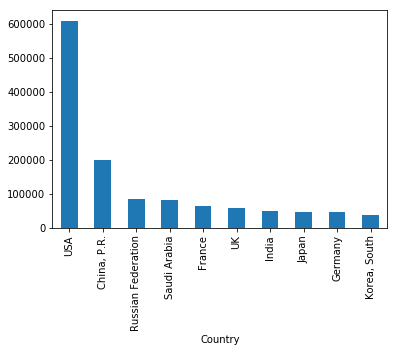

In [188]:
 plot_percapita(ME5)

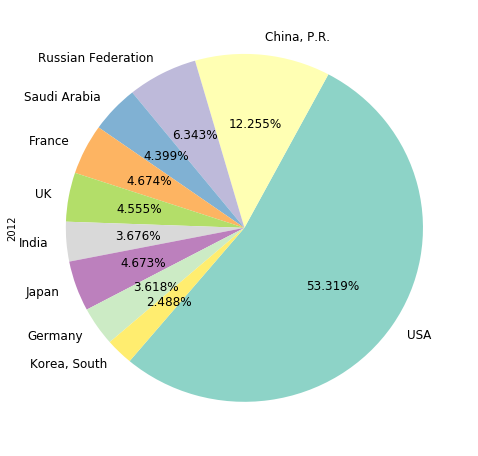

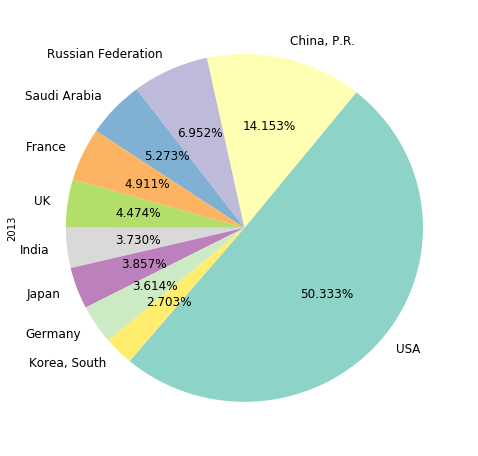

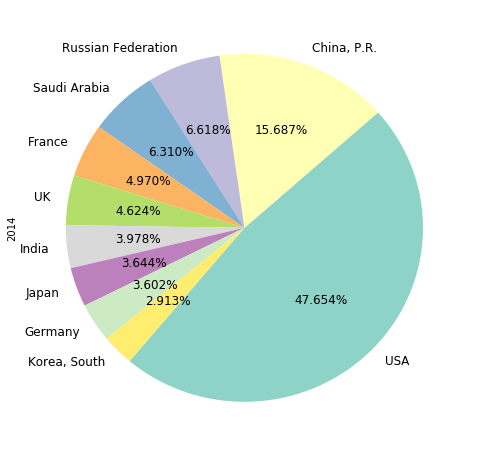

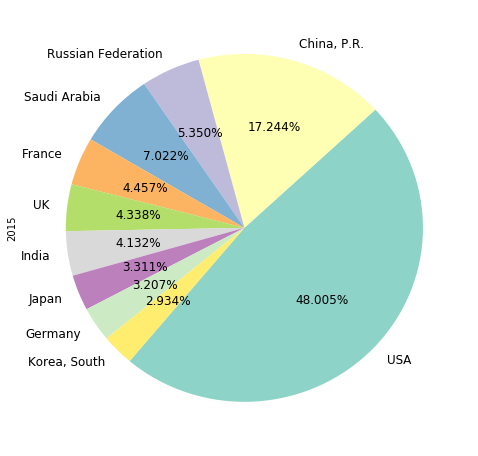

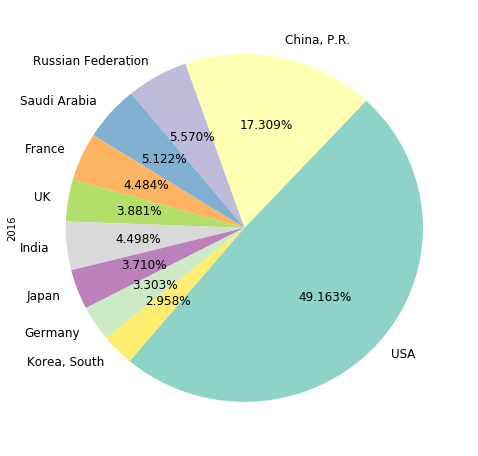

In [189]:
#pie chart of military expenditure from 2012-2016

ME5['2012'].plot.pie(subplots=True, colormap='Set3', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()
ME5['2013'].plot.pie(subplots=True, colormap='Set3', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()
ME5['2014'].plot.pie(subplots=True, colormap='Set3', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()
ME5['2015'].plot.pie(subplots=True, colormap='Set3', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()
ME5['2016'].plot.pie(subplots=True, colormap='Set3', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()

In [190]:
#the fastest growing countries in military spending----China

ME5['2016']- ME5['2012']

Country
USA                  -73593.557000
China, P.R.           57785.552867
Russian Federation   -12224.090470
Saudi Arabia           7174.933333
France                -4289.678311
UK                   -10243.138483
India                  8706.249756
Japan                -13885.202644
Germany               -5403.406089
Korea, South           4824.972647
dtype: float64

In [191]:
#fixed value in percentages 
fixed_value=(ME5['2016']-ME5['2012'])/ME5['2012']*100
fixed_value

Country
USA                  -10.747037
China, P.R.           36.714794
Russian Federation   -15.004518
Saudi Arabia          12.699477
France                -7.145277
UK                   -17.510939
India                 18.438835
Japan                -23.137558
Germany              -11.627512
Korea, South          15.100804
dtype: float64

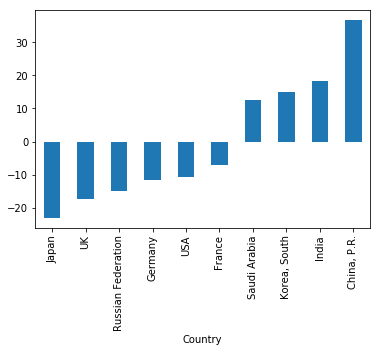

In [192]:
#in military spending in fixed value in percentage graph
fixed_value=fixed_value.sort_values(ascending =True)
fixed_value.plot(kind='bar', stacked=True,sort_columns=True)

plt.show()

In [193]:
#get Share of GDP data; find 10 countries
share_GDP = pd.read_excel('military expenditure dataset.xlsx', sheetname='Share of GDP',skiprows=5, skipfooter=8, index_col=0)
share_GDP = share_GDP.replace('xxx',0)
share_GDP = share_GDP.replace('. .',0)
share_GDP = share_GDP.replace('...',0)
share_GDP.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.029233,0.030247,0.038485,0.035180,0.043258,0.044613,0.048438,0.055440,0.063159,0.066629
Libya,‡ ¶ 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.008706,0.011540,0.000000,0.000000,0.000000,0.033394,0.054963,0.078053,0.000000,0.000000
Morocco,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011807,0.01759,...,0.030470,0.031835,0.032887,0.033908,0.032975,0.034628,0.037912,0.036803,0.032452,0.032042


In [194]:
#find The ten countries we already chose in the Share of GDP dataset
Top10_share_GDP= pd.DataFrame(share_GDP, index = ['USA','China, P.R.','Russian Federation','Saudi Arabia','India','France','UK','Japan','Germany','Korea, South'])
Top10_share_GDP

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
USA,34,0.05053,0.048709,0.097447,0.132844,0.130162,0.112491,0.097344,0.094898,0.095774,...,0.038471,0.042200,0.046368,0.046656,0.045840,0.042387,0.038325,0.035066,0.033044,0.032927
"China, P.R.",48,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019199,0.018920,0.020832,0.019268,0.018539,0.018579,0.018898,0.019248,0.019378,0.019319
Russian Federation,84,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033882,0.033339,0.041407,0.038162,0.036664,0.039931,0.041993,0.045223,0.049026,0.053170
Saudi Arabia,§ 100,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.085270,0.073534,0.096172,0.085884,0.072488,0.076977,0.090040,0.107136,0.134962,0.104135
India,54,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020200,0.024750,...,0.023426,0.025502,0.028935,0.027075,0.026516,0.025355,0.024641,0.024882,0.024239,0.024998
France,86,0.00000,0.055409,0.071274,0.086049,0.090140,0.072869,0.064107,0.076912,0.073343,...,0.022745,0.022594,0.024827,0.023357,0.022576,0.022390,0.022215,0.022391,0.022879,0.022727
UK,93,0.00000,0.064467,0.074187,0.092778,0.098023,0.089941,0.081251,0.076578,0.071427,...,0.022268,0.023504,0.025083,0.024121,0.023254,0.022370,0.021232,0.020062,0.018914,0.018585
Japan,† 49,0.00000,0.000000,0.000000,0.020709,0.020311,0.021932,0.021029,0.017459,0.014966,...,0.009304,0.009561,0.010221,0.009946,0.010289,0.010078,0.009918,0.010096,0.009910,0.009890
Germany,NaN,0.00000,0.000000,0.000000,0.000000,0.042137,0.039735,0.040837,0.036237,0.041412,...,0.012386,0.012832,0.013910,0.013557,0.012830,0.013152,0.012313,0.011967,0.011875,0.011905
"Korea, South",51,0.00000,0.000000,0.000000,0.000000,0.023629,0.058537,0.062423,0.083278,0.067961,...,0.024774,0.026015,0.027248,0.025742,0.025773,0.026130,0.026313,0.026419,0.026441,0.026532


In [195]:
# find the top ten countries during 5 years
Top10_share_GDP = Top10_share_GDP.loc[:, [2012,2013,2014,2015,2016]]
Top10_share_GDP.columns=['2012','2013','2014','2015','2016']
Top10_share_GDP = Top10_share_GDP.sort_values(by='2014',ascending=False).head(10)
Top10_share_GDP

,2012,2013,2014,2015,2016
Saudi Arabia,0.076977,0.090040,0.107136,0.134962,0.104135
Russian Federation,0.039931,0.041993,0.045223,0.049026,0.053170
USA,0.042387,0.038325,0.035066,0.033044,0.032927
"Korea, South",0.026130,0.026313,0.026419,0.026441,0.026532
India,0.025355,0.024641,0.024882,0.024239,0.024998
France,0.022390,0.022215,0.022391,0.022879,0.022727
UK,0.022370,0.021232,0.020062,0.018914,0.018585
"China, P.R.",0.018579,0.018898,0.019248,0.019378,0.019319
Germany,0.013152,0.012313,0.011967,0.011875,0.011905
Japan,0.010078,0.009918,0.010096,0.009910,0.009890


In [196]:
for column in Top10_share_GDP:
    Top10_share_GDP[column] = Top10_share_GDP[column]*100

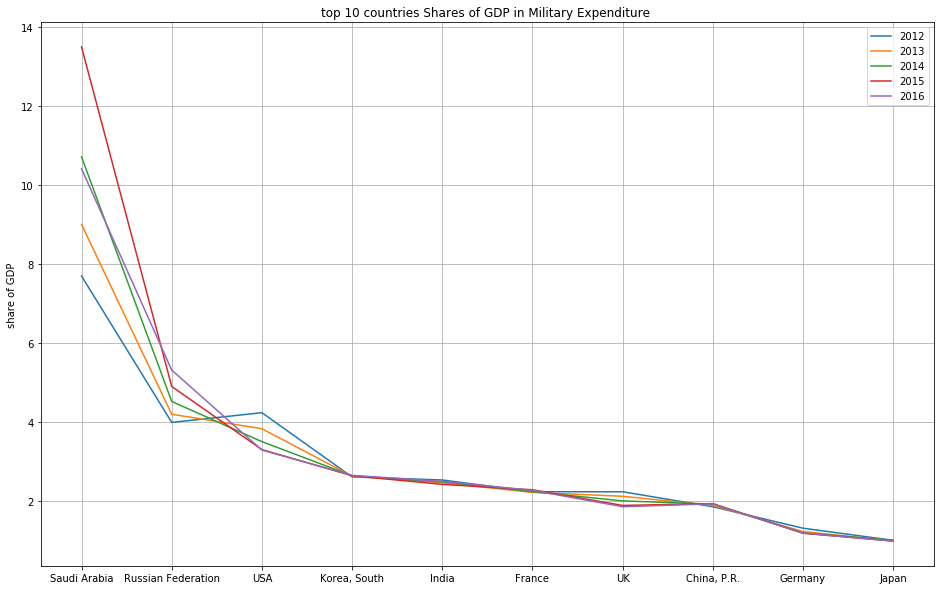

In [197]:
#Military expenditure by country as percentage of gross domestic product(Graph)
plt.figure(figsize=(16,10))
for i in Top10_share_GDP.columns:
    plt.plot(range(len(Top10_share_GDP[i].index)),Top10_share_GDP[i].values)
plt.xticks(range(10),Top10_share_GDP.index)
plt.ylabel('share of GDP')
plt.title('top 10 countries Shares of GDP in Military Expenditure ')
plt.legend(Top10_share_GDP.columns)
plt.grid(True)
plt.show()

In [198]:
#line chart for top 10 countries
Top10_share_GDPTransposed = Top10_share_GDP.transpose()
Top10_share_GDPTransposedPlot = Top10_share_GDPTransposed.plot.line(legend=False,figsize=(12,8),fontsize=10)
Top10_share_GDPTransposedPlot.set_ylabel('Share of GDP',fontsize=15)
Top10_share_GDPTransposedPlot.set_xlabel('Year',fontsize=15)
Top10_share_GDPTransposedPlot.set_title('Top 10 countries in Military Spending',fontsize=20)
Top10_share_GDPTransposedPlot.legend()

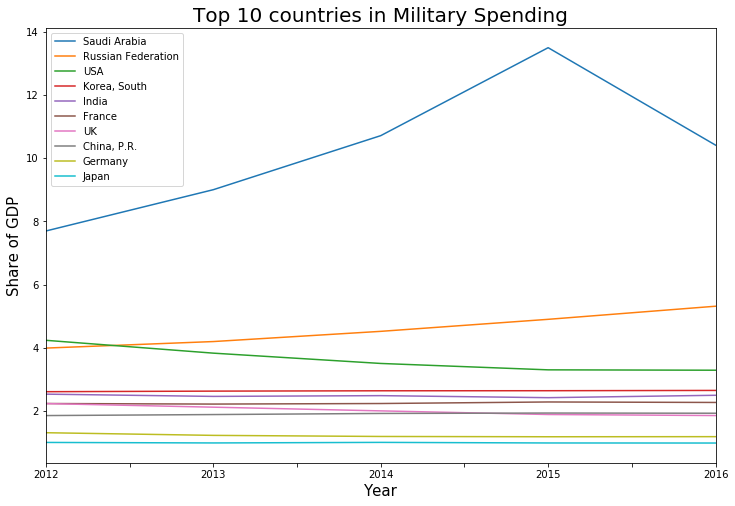

In [199]:
plt.show()

In [200]:
#Read GDP per capita excel
per_capita = pd.read_excel('GDP per capita.xls', sheetname='Data',skiprows=3, index_col=0)
per_capita = per_capita.replace('xxx',0)
per_capita = per_capita.replace('. .',0)
per_capita = per_capita.replace('...',0)
per_capita.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48510.467283,47712.299081,43215.687013,39627.663516,40919.183279,38167.095746,40215.435317,NaN,NaN,NaN


In [201]:
#find the year 2012-2016
per_capita = per_capita.loc[:, ['2012','2013','2014','2015','2016']]
per_capita.head()

,2012,2013,2014,2015,2016
Country Name,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN
Afghanistan,669.009051,631.744971,612.069651,584.025902,561.778746
Angola,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
Albania,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
Andorra,38167.095746,40215.435317,NaN,NaN,NaN


In [202]:
#change columns name
per_capita.columns=['2012_GDP_per_capita','2013_GDP_per_capita','2014_GDP_per_capita','2015_GDP_per_capita','2016_GDP_per_capita']
per_capita.head()

,2012_GDP_per_capita,2013_GDP_per_capita,2014_GDP_per_capita,2015_GDP_per_capita,2016_GDP_per_capita
Country Name,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN
Afghanistan,669.009051,631.744971,612.069651,584.025902,561.778746
Angola,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
Albania,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
Andorra,38167.095746,40215.435317,NaN,NaN,NaN


In [203]:
#rename the countries name
per_capita=per_capita.rename(index={'United States': 'USA'})
per_capita=per_capita.rename(index={'China': 'China, P.R.'})
per_capita=per_capita.rename(index={'United Kingdom': 'UK'})
per_capita=per_capita.rename(index={'Korea, Rep.': 'Korea, South'})

Top10GDP_per_capita = pd.DataFrame(per_capita, index = ['USA','China, P.R.','Russian Federation','Saudi Arabia','India','France','UK','Japan','Germany','Korea, South'])
Top10GDP_per_capita

,2012_GDP_per_capita,2013_GDP_per_capita,2014_GDP_per_capita,2015_GDP_per_capita,2016_GDP_per_capita
USA,51450.122295,52787.026949,54598.550689,56207.036747,57466.787113
"China, P.R.",6337.882993,7077.770594,7683.502038,8069.211938,8123.180873
Russian Federation,15154.456873,15543.676532,14125.906098,9329.298351,8748.364504
Saudi Arabia,25303.094621,24934.386142,24575.403037,20732.861722,20028.648207
India,1446.985410,1452.195373,1573.118089,1613.188708,1709.387921
France,40838.024437,42554.122054,42955.242866,36526.770108,36854.968280
UK,41538.307262,42407.371015,46412.117271,43929.690813,39899.388395
Japan,48603.476650,40454.447458,38096.211505,34474.137360,38894.467729
Germany,44065.248908,46530.911428,47902.652884,41176.881576,41936.058575
"Korea, South",24358.782176,25890.018670,27811.366384,27105.076226,27538.806128


In [204]:
#add average column
Top10GDP_per_capita['Average'] = Top10GDP_per_capita.mean(axis=1)
Top10GDP_per_capita

,2012_GDP_per_capita,2013_GDP_per_capita,2014_GDP_per_capita,2015_GDP_per_capita,2016_GDP_per_capita,Average
USA,51450.122295,52787.026949,54598.550689,56207.036747,57466.787113,54501.904759
"China, P.R.",6337.882993,7077.770594,7683.502038,8069.211938,8123.180873,7458.309687
Russian Federation,15154.456873,15543.676532,14125.906098,9329.298351,8748.364504,12580.340472
Saudi Arabia,25303.094621,24934.386142,24575.403037,20732.861722,20028.648207,23114.878746
India,1446.985410,1452.195373,1573.118089,1613.188708,1709.387921,1558.975100
France,40838.024437,42554.122054,42955.242866,36526.770108,36854.968280,39945.825549
UK,41538.307262,42407.371015,46412.117271,43929.690813,39899.388395,42837.374951
Japan,48603.476650,40454.447458,38096.211505,34474.137360,38894.467729,40104.548140
Germany,44065.248908,46530.911428,47902.652884,41176.881576,41936.058575,44322.350674
"Korea, South",24358.782176,25890.018670,27811.366384,27105.076226,27538.806128,26540.809917


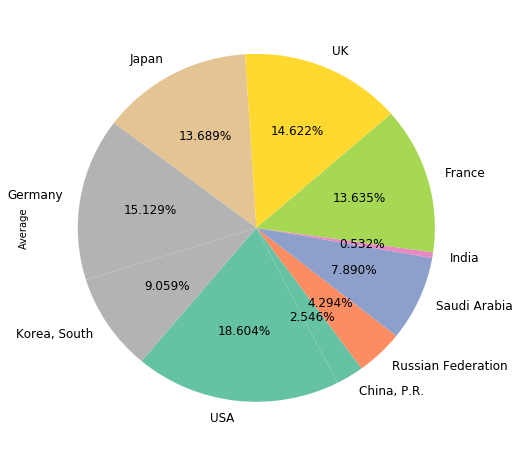

In [213]:
#plt of average of GDP per capita
Top10GDP_per_capita['Average'].plot.pie(subplots=True, colormap='Set2', autopct='%.3f%%',startangle=230, fontsize=12, figsize=(8,8),legend=False)
plt.show()

In [206]:
#read Military Expenditure Per capita dataset
ME_per_capita = pd.read_excel('military expenditure dataset.xlsx', sheetname='Per capita',skiprows=6, skipfooter=8, index_col=0)
ME_per_capita = ME_per_capita.replace('xxx',0)
ME_per_capita = ME_per_capita.replace('. .',0)
ME_per_capita = ME_per_capita.replace('...',0)
ME_per_capita.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,41.827937,33.823425,34.897208,21.280868,38.751507,45.955234,47.066883,42.715277,49.38253,...,115.166028,148.583153,149.161615,157.378291,235.645775,249.103362,266.106749,249.763614,262.506372,252.737523
Libya,‡ ¶ 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,106.207864,179.661065,0.000000,0.000000,0.000000,475.445138,632.731947,600.042850,0.000000,0.000000
Morocco,3,38.176075,40.448396,42.874349,45.196288,47.494990,47.570510,51.041849,52.938096,52.51422,...,77.660354,93.936439,96.328976,98.443706,102.751219,103.161570,121.531417,119.353401,95.072717,95.507381


In [207]:
#find the 5 years data for Military Expenditure Per capita dataset
ME_per_capita = ME_per_capita.loc[:, [2012,2013,2014,2015,2016]]
ME_per_capita.head()

,2012,2013,2014,2015,2016
Country,,,,,
Africa,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN
Algeria,249.103362,266.106749,249.763614,262.506372,252.737523
Libya,475.445138,632.731947,600.042850,0.000000,0.000000
Morocco,103.161570,121.531417,119.353401,95.072717,95.507381


In [208]:
#rename the columns
ME_per_capita.columns=['2012_ME_per_capita','2013_ME_per_capita','2014_ME_per_capita','2015_ME_per_capita','2016_ME_per_capita']
ME_per_capita.head()

,2012_ME_per_capita,2013_ME_per_capita,2014_ME_per_capita,2015_ME_per_capita,2016_ME_per_capita
Country,,,,,
Africa,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN
Algeria,249.103362,266.106749,249.763614,262.506372,252.737523
Libya,475.445138,632.731947,600.042850,0.000000,0.000000
Morocco,103.161570,121.531417,119.353401,95.072717,95.507381


In [209]:
#rename the countries and find top 10 countries' data
ME_per_capita=ME_per_capita.rename(index={'USSR/Russia': 'Russian Federation'})
Top10ME_per_capita = pd.DataFrame(ME_per_capita, index = ['USA','China, P.R.','Russian Federation','Saudi Arabia','India','France','UK','Japan','Germany','Korea, South'])
Top10ME_per_capita

,2012_ME_per_capita,2013_ME_per_capita,2014_ME_per_capita,2015_ME_per_capita,2016_ME_per_capita
USA,2175.289593,2017.128813,1909.270960,1852.263770,1886.163936
"China, P.R.",116.122099,132.020968,146.609445,155.585360,155.744037
Russian Federation,568.572831,616.269339,590.509923,462.987140,483.114388
Saudi Arabia,1915.438590,2219.128069,2614.808487,2764.262472,1978.189179
India,37.367290,37.048512,39.307065,39.125482,42.140352
France,944.516293,977.642096,992.082502,859.411989,862.357787
UK,920.122566,889.081043,919.969197,832.287898,741.311939
Japan,472.012071,386.060923,367.795823,324.738058,365.395346
Germany,577.436052,570.099295,571.665343,493.410511,509.330221
"Korea, South",644.078986,689.194547,744.616430,724.402256,728.796667


In [210]:
#merge two charts together
ME_GDP=Top10ME_per_capita.join(Top10GDP_per_capita)
ME_GDP

,2012_ME_per_capita,2013_ME_per_capita,2014_ME_per_capita,2015_ME_per_capita,2016_ME_per_capita,2012_GDP_per_capita,2013_GDP_per_capita,2014_GDP_per_capita,2015_GDP_per_capita,2016_GDP_per_capita,Average
USA,2175.289593,2017.128813,1909.270960,1852.263770,1886.163936,51450.122295,52787.026949,54598.550689,56207.036747,57466.787113,54501.904759
"China, P.R.",116.122099,132.020968,146.609445,155.585360,155.744037,6337.882993,7077.770594,7683.502038,8069.211938,8123.180873,7458.309687
Russian Federation,568.572831,616.269339,590.509923,462.987140,483.114388,15154.456873,15543.676532,14125.906098,9329.298351,8748.364504,12580.340472
Saudi Arabia,1915.438590,2219.128069,2614.808487,2764.262472,1978.189179,25303.094621,24934.386142,24575.403037,20732.861722,20028.648207,23114.878746
India,37.367290,37.048512,39.307065,39.125482,42.140352,1446.985410,1452.195373,1573.118089,1613.188708,1709.387921,1558.975100
France,944.516293,977.642096,992.082502,859.411989,862.357787,40838.024437,42554.122054,42955.242866,36526.770108,36854.968280,39945.825549
UK,920.122566,889.081043,919.969197,832.287898,741.311939,41538.307262,42407.371015,46412.117271,43929.690813,39899.388395,42837.374951
Japan,472.012071,386.060923,367.795823,324.738058,365.395346,48603.476650,40454.447458,38096.211505,34474.137360,38894.467729,40104.548140
Germany,577.436052,570.099295,571.665343,493.410511,509.330221,44065.248908,46530.911428,47902.652884,41176.881576,41936.058575,44322.350674
"Korea, South",644.078986,689.194547,744.616430,724.402256,728.796667,24358.782176,25890.018670,27811.366384,27105.076226,27538.806128,26540.809917


In [211]:
#Compare the per person military spending to the per person GDP
ME_GDP['2016_ME_per_capita']/ME_GDP['2016_GDP_per_capita']

USA                   0.032822
China, P.R.           0.019173
Russian Federation    0.055223
Saudi Arabia          0.098768
India                 0.024652
France                0.023399
UK                    0.018580
Japan                 0.009395
Germany               0.012145
Korea, South          0.026464
dtype: float64

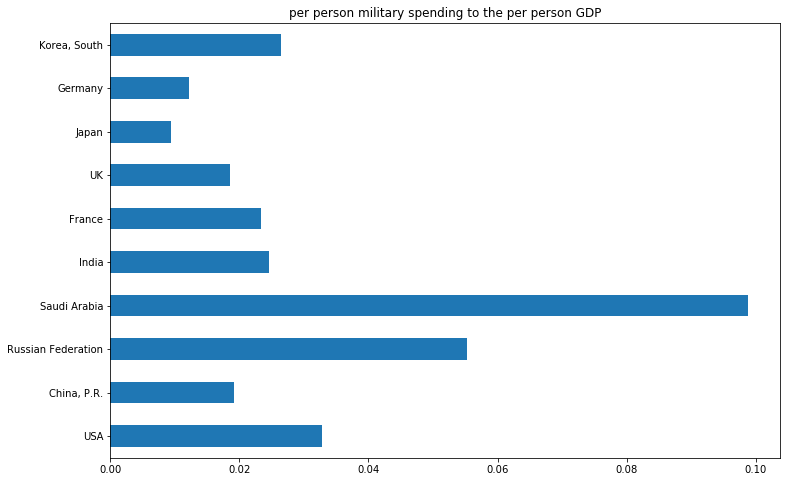

In [212]:
#per person military spending to the per person GDP

Growing = ME_GDP['2016_ME_per_capita']/ME_GDP['2016_GDP_per_capita']

Growing.plot.barh(fontsize=10,legend=False,figsize=(12,8))

plt.title('per person military spending to the per person GDP')

plt.show()